In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [27]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\Abhay\AppData\Local\Temp\ipykernel_1080\2194379965.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
data.reset_index(inplace=True)

In [29]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746803,96.645521,93.384904,94.975448,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [30]:
ma_100_days = data.Close.rolling(100).mean()

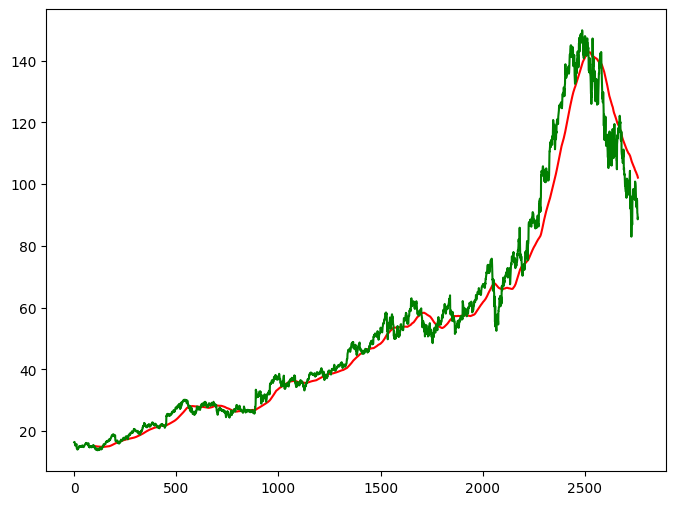

In [31]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [32]:
ma_200_days = data.Close.rolling(200).mean()

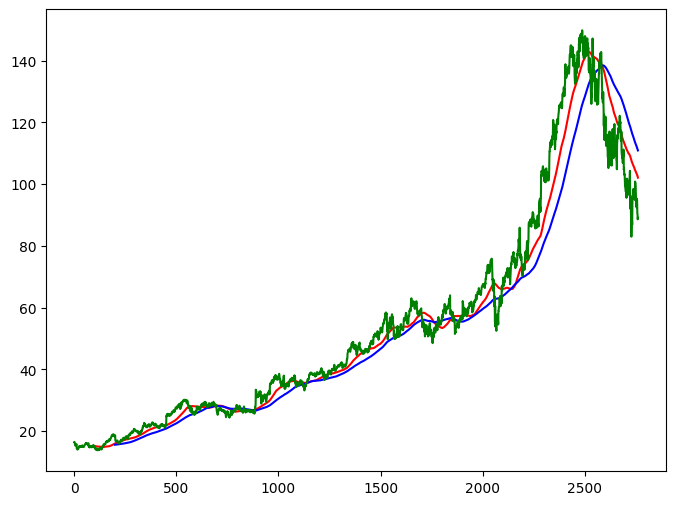

In [33]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [34]:
data.dropna(inplace=True)

In [35]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [36]:
data_train.shape[0]

2208

In [37]:
data_test.shape[0]

553

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_train_scale = scaler.fit_transform(data_train)

In [40]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [41]:
x, y = np.array(x), np.array(y)

In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Abhay\OneDrive\Desktop\VS\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0311
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0311
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0068
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0068
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0055
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0055
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0049
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0049
Epoch 6/50
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0045
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0045
Epoch 7/50
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 

In [ ]:
# Build the model by providing an input shape
model.build(input_shape=(None, x.shape[1], 1))

In [46]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [47]:
pas_100_days = data_train.tail(100)

In [48]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [49]:
data_test_scale  =  scaler.fit_transform(data_test)

In [50]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [51]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [52]:
scale =1/scaler.scale_

In [53]:
y_predict = y_predict*scale

In [54]:
y = y*scale

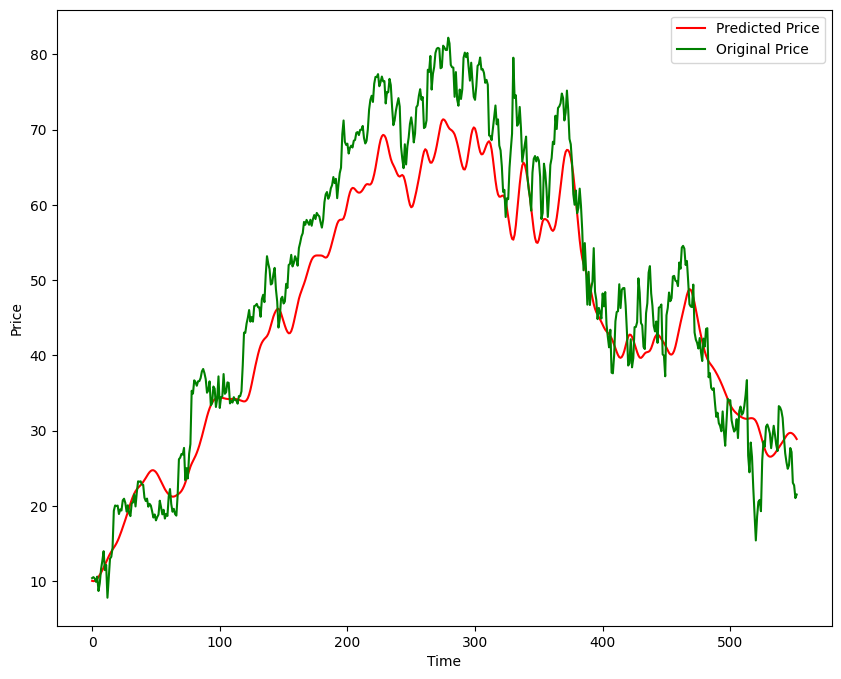

In [55]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
model.save('Stock Predictions Model.keras')